# Detalles del Modelo de Red Neuronal para Predicción de Incumplimiento de Crédito

## Arquitectura del Modelo
El modelo tiene una arquitectura **secuencial**, lo que significa que las capas están organizadas en orden, una después de otra. A continuación, se detalla su estructura:

### Capas
1. **Capa de Entrada**:
   - **Neuronas**: 128
   - **Función de Activación**: `ReLU` (Rectified Linear Unit).
   - **Descripción**: Esta es la capa que recibe las características normalizadas como entrada. Cada característica corresponde a una neurona.

2. **Primera Capa Oculta**:
   - **Neuronas**: 64
   - **Función de Activación**: `ReLU`.
   - **Dropout**: 30%. Esto significa que el 30% de las neuronas se desactivan aleatoriamente durante cada paso de entrenamiento para prevenir el sobreajuste.

3. **Segunda Capa Oculta**:
   - **Neuronas**: 32
   - **Función de Activación**: `ReLU`.
   - **Dropout**: 30%.

4. **Capa de Salida**:
   - **Neuronas**: 1
   - **Función de Activación**: `Sigmoid`.
   - **Descripción**: Esta capa produce una salida entre 0 y 1, que representa la probabilidad de incumplir el pago del préstamo.

---

## Parámetros de Compilación
1. **`loss`**:
   - Valor: `binary_crossentropy`.
   - Descripción: La función de pérdida mide la diferencia entre las probabilidades predichas por el modelo y las etiquetas reales. Es adecuada para problemas de clasificación binaria.

2. **`optimizer`**:
   - Valor: `adam`.
   - Descripción: Es un optimizador adaptativo que ajusta los pesos del modelo basándose en el gradiente descendente. Combina las ventajas de los métodos RMSProp y Momentum.

3. **Métricas**:
   - Métrica principal: `accuracy` (precisión).
   - Descripción: Mide la proporción de predicciones correctas del modelo.

---

## Normalización de Características
La normalización de características se realizó para mejorar la capacidad del modelo de entrenar eficientemente. Esto se logró mediante `StandardScaler` de scikit-learn. A continuación, se detalla el proceso:

1. **Características Seleccionadas**:
   - Todas las características numéricas del conjunto de datos.

2. **Proceso**:
   - Cada característica fue transformada para tener:
     - **Media**: 0.
     - **Desviación estándar**: 1.


3. **Resultados**:
   - Las características normalizadas aseguran que todas las entradas al modelo estén en la misma escala, lo que previene problemas de dominancia de características con valores más altos.

---

## Entrenamiento del Modelo
1. **Épocas**:
   - Número total: 20.
   - Descripción: Cada época implica pasar por todo el conjunto de datos de entrenamiento una vez para ajustar los pesos del modelo.

2. **Tamaño del Lote**:
   - Valor: 32.
   - Descripción: Número de muestras procesadas antes de actualizar los pesos.

3. **Conjunto de Validación**:
   - Porcentaje: 20%.
   - Descripción: Parte del conjunto de entrenamiento reservada para evaluar el rendimiento del modelo durante el entrenamiento.

---

## Ventajas de la Arquitectura y Configuración
1. **ReLU**:
   - Beneficio: Resuelve problemas de desvanecimiento de gradiente y acelera la convergencia.
2. **Sigmoid**:
   - Beneficio: Adecuado para problemas de clasificación binaria, ya que produce probabilidades.
3. **Dropout**:
   - Beneficio: Reduce el sobreajuste al desactivar neuronas de forma aleatoria.

---


## 1. Normalización de los datos 

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Cargar datos
data = pd.read_csv("cleaned_dataset.csv")

# Convertir variables categóricas a numéricas
categorical_features = ['term', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type']
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

# Separar características y etiqueta
X = data[['term', 'int_rate', 'installment', 'sub_grade', 'emp_length', 'home_ownership',
          'annual_inc', 'verification_status', 'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths',
          'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
          'out_prncp', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'last_pymnt_amnt',
          'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq', 'tot_coll_amt',
          'tot_cur_bal', 'total_rev_hi_lim']]

y = data['loan_status']

# Escalar características numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## 2. División en Conjuntos de Entrenamiento y Prueba

In [8]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## 3. Construcción, Compilación y Entrenamiento del Modelo

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Construir el modelo de red neuronal
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Evaluar el modelo
eval_results = model.evaluate(X_test, y_test, verbose=0)
print(f"\nEvaluación del modelo:\nPérdida: {eval_results[0]:.4f}\nPrecisión: {eval_results[1]:.4f}")


c:\Users\samue\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
15480/15480 ━━━━━━━━━━━━━━━━━━━━ 54s 3ms/step - accuracy: 0.9736 - loss: 0.1045 - val_accuracy: 0.9829 - val_loss: 0.0736
Epoch 2/20
15480/15480 ━━━━━━━━━━━━━━━━━━━━ 51s 3ms/step - accuracy: 0.9828 - loss: 0.0751 - val_accuracy: 0.9836 - val_loss: 0.0711
Epoch 3/20
15480/15480 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - accuracy: 0.9834 - loss: 0.0730 - val_accuracy: 0.9837 - val_loss: 0.0706
Epoch 4/20
15480/15480 ━━━━━━━━━━━━━━━━━━━━ 51s 3ms/step - accuracy: 0.9834 - loss: 0.0726 - val_accuracy: 0.9834 - val_loss: 0.0720
Epoch 5/20
15480/15480 ━━━━━━━━━━━━━━━━━━━━ 47s 3ms/step - accuracy: 0.9836 - loss: 0.0722 - val_accuracy: 0.9839 - val_loss: 0.0708
Epoch 6/20
15480/15480 ━━━━━━━━━━━━━━━━━━━━ 51s 3ms/step - accuracy: 0.9838 - loss: 0.0715 - val_accuracy: 0.9838 - val_loss: 0.0701
Epoch 7/20
 6811/15480 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9836 - loss: 0.0717

KeyboardInterrupt: 

## Se guarda el modelo

In [6]:
model.save("modelo_guardado.keras")



NameError: name 'model' is not defined

## Evaluación del modelo

4838/4838 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step


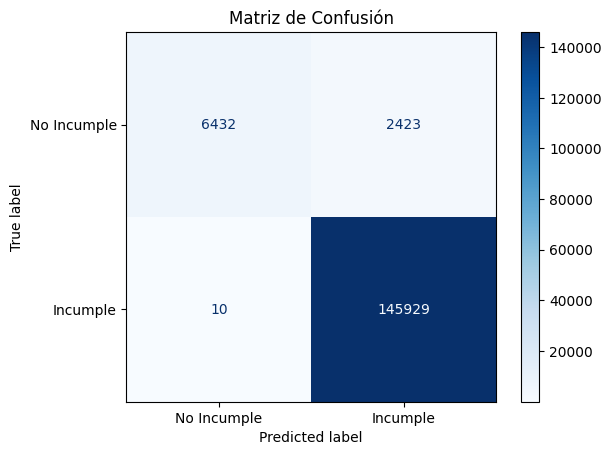

Reporte de Clasificación:
              precision    recall  f1-score   support

 No Incumple       1.00      0.73      0.84      8855
    Incumple       0.98      1.00      0.99    145939

    accuracy                           0.98    154794
   macro avg       0.99      0.86      0.92    154794
weighted avg       0.98      0.98      0.98    154794

Precisión (Accuracy): 0.9843
Precisión (Precision): 0.9837
Sensibilidad (Recall): 0.9999
Especificidad: 0.7264
F1-Score: 0.9917


In [11]:
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Cargar el modelo entrenado
model = load_model("modelo_entrenado.keras")

# Generar predicciones con los datos de prueba
y_pred_prob = model.predict(X_test)  # Obtiene probabilidades
y_pred = (y_pred_prob > 0.5).astype(int)  # Convierte a clases binarias (0 o 1)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Incumple", "Incumple"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

# Reporte de clasificación
report = classification_report(y_test, y_pred, target_names=["No Incumple", "Incumple"])
print("Reporte de Clasificación:")
print(report)

# Métricas adicionales
tn, fp, fn, tp = cm.ravel()
accuracy = (tp + tn) / (tn + fp + fn + tp)
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print(f"Precisión (Accuracy): {accuracy:.4f}")
print(f"Precisión (Precision): {precision:.4f}")
print(f"Sensibilidad (Recall): {recall:.4f}")
print(f"Especificidad: {specificity:.4f}")
print(f"F1-Score: {f1_score:.4f}")
